# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


# Exercise 15.1

Estimate a Logistic Regression, a Random Forest and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [4]:
# Data Frame para guardar modelos
results=pd.DataFrame(columns=['Método','Modelo','Param_Iter','Accuracy','F1 Score','F_Beta-Score'])

X = df.drop(['Label'], axis=1)
y = df['Label']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [5]:
clf1=DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_pred=clf1.predict(X_test)

results=results.append({'Método':'Ninguno','Modelo':'Decision Tree',
                        'Accuracy':round(metrics.accuracy_score(y_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y_pred, y_test,beta=10),4)},ignore_index=True)

print('Decision Tree F1 score:',round(metrics.f1_score(y_pred, y_test),4),
'\nDecision Tree  accuracy score:',round(metrics.accuracy_score(y_pred, y_test),4),
'\nDecision Tree  F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y_pred, y_test,beta=10),4))

Decision Tree F1 score: 0.1346 
Decision Tree  accuracy score: 0.9889 
Decision Tree  F_Beta-Score (Beta=10): 0.1243


In [6]:
clf2=LogisticRegression(solver='sag',random_state=1).fit(X_train,y_train)
y_pred=clf2.predict(X_test)

results=results.append({'Método':'Ninguno','Modelo':'Logistic Regression',
                        'Accuracy':round(metrics.accuracy_score(y_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y_pred, y_test,beta=10),4)},ignore_index=True)

print('Logistic Regression F1 score:',round(metrics.f1_score(y_pred, y_test),4),
'\nLogistic Regression accuracy score:',round(metrics.accuracy_score(y_pred, y_test),4),
'\nLogistic Regression F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y_pred, y_test,beta=10),4))

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf3=RandomForestClassifier(n_estimators=10,random_state=1).fit(X_train,y_train)
y_pred=clf3.predict(X_test)

results=results.append({'Método':'Ninguno','Modelo':'Random Forest',
                        'Accuracy':round(metrics.accuracy_score(y_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y_pred, y_test,beta=10),4)},ignore_index=True)

print('Random Forest F1 score:',round(metrics.f1_score(y_pred, y_test),4),
'\nRandom Forest accuracy score:',round(metrics.accuracy_score(y_pred, y_test),4),
'\nRandom Forest F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y_pred, y_test,beta=10),4))

Random Forest F1 score: 0.1418 
Random Forest accuracy score: 0.9942 
Random Forest F_Beta-Score (Beta=10): 0.512


El modelo de RF sin tunning, como se esperaba genera los resultados mas precisos, teniendo los indicadores más altos en los 3 calculados.

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

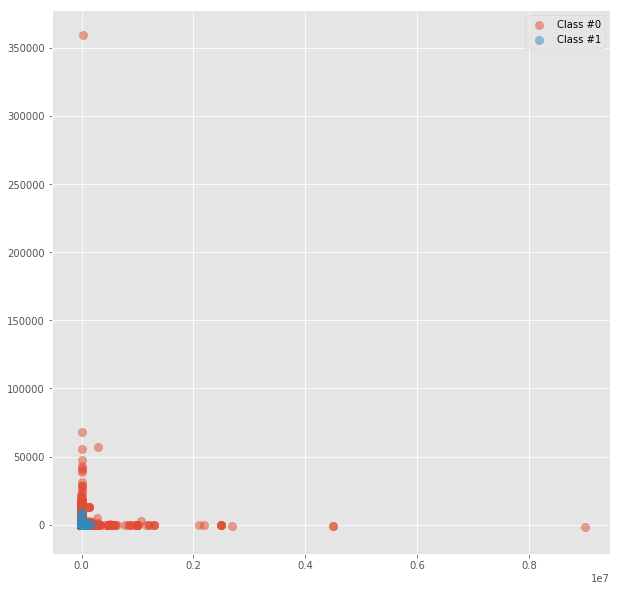

In [9]:
# Fit and transform x to visualise inside a 2D feature space
pca = PCA(n_components = 2)
x_vis = pca.fit_transform(X_train)

# Plot the original data

def plot_two_classes(X_train, y_train, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train)

In [10]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

---------------------------------------------------------------------------------------------------------------
Target percentage 0.1
y.shape =  5497 y.mean() =  0.100418410041841


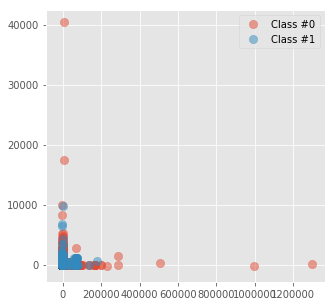

Decision Tree F1 score: 0.0531 
Decision Tree accuracy score: 0.9203 
Decision Tree F_Beta-Score (Beta=10): 0.0288 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1548 
Random Forest accuracy score: 0.9835 
F_Beta-Score (Beta=10): 0.1113 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.2
y.shape =  2755 y.mean() =  0.20036297640653358


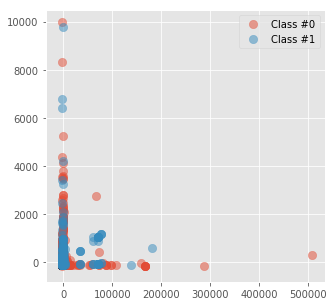

Decision Tree F1 score: 0.0411 
Decision Tree accuracy score: 0.8598 
Decision Tree F_Beta-Score (Beta=10): 0.0216 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1079 
Random Forest accuracy score: 0.9583 
F_Beta-Score (Beta=10): 0.0623 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.3
y.shape =  1790 y.mean() =  0.30837988826815643


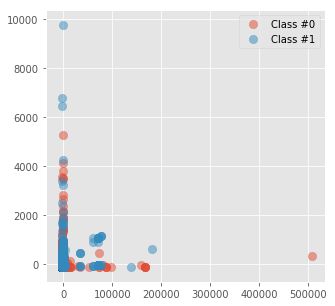

Decision Tree F1 score: 0.0322 
Decision Tree accuracy score: 0.7848 
Decision Tree F_Beta-Score (Beta=10): 0.0167 

Logistic Regression F1 score: 0.0188 
Logistic Regression accuracy score: 0.9623 
Logistic Regression F_Beta-Score (Beta=10): 0.0112 

Random Forest F1 score: 0.0624 
Random Forest accuracy score: 0.9148 
F_Beta-Score (Beta=10): 0.0337 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.4
y.shape =  1333 y.mean() =  0.41410352588147037


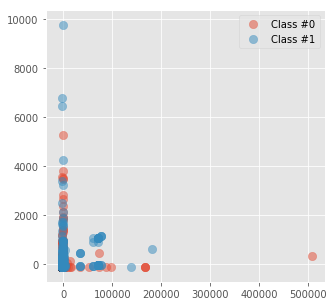

Decision Tree F1 score: 0.0243 
Decision Tree accuracy score: 0.7219 
Decision Tree F_Beta-Score (Beta=10): 0.0125 

Logistic Regression F1 score: 0.0169 
Logistic Regression accuracy score: 0.37 
Logistic Regression F_Beta-Score (Beta=10): 0.0086 

Random Forest F1 score: 0.0406 
Random Forest accuracy score: 0.841 
F_Beta-Score (Beta=10): 0.0213 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.5
y.shape =  1079 y.mean() =  0.5115848007414272


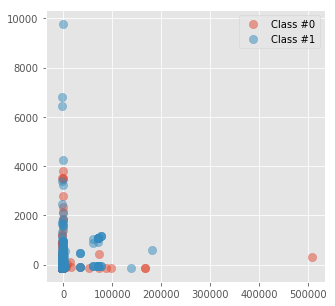

Decision Tree F1 score: 0.0211 
Decision Tree accuracy score: 0.6472 
Decision Tree F_Beta-Score (Beta=10): 0.0108 

Logistic Regression F1 score: 0.0158 
Logistic Regression accuracy score: 0.3187 
Logistic Regression F_Beta-Score (Beta=10): 0.008 

Random Forest F1 score: 0.0314 
Random Forest accuracy score: 0.7628 
F_Beta-Score (Beta=10): 0.0162 



In [11]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print('---------------------------------------------------------------------------------------------------------------')
    X_u, y_u = UnderSampling(x_vis, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()
    
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    
    clf1=DecisionTreeClassifier(random_state=1).fit(X_u,y_u)
    y1_pred=clf1.predict(X_test)
    
    clf2=LogisticRegression(solver='sag',random_state=1).fit(X_u,y_u)
    y2_pred=clf2.predict(X_test)
    
    clf3=RandomForestClassifier(n_estimators=10,random_state=1).fit(X_u,y_u)
    y3_pred=clf3.predict(X_test)
    
    results=results.append({'Método':'Random Under Sampling','Modelo':'Decision Tree',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y1_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y1_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y1_pred, y_test,beta=10),4)},ignore_index=True)
    
    results=results.append({'Método':'Random Under Sampling','Modelo':'Logistic Regressiont',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y2_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y2_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y2_pred, y_test,beta=10),4)},ignore_index=True)
    
    results=results.append({'Método':'Random Under Sampling','Modelo':'Random Forest',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y3_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y3_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y3_pred, y_test,beta=10),4)},ignore_index=True)

    print('Decision Tree F1 score:',round(metrics.f1_score(y1_pred, y_test),4),
    '\nDecision Tree accuracy score:',round(metrics.accuracy_score(y1_pred, y_test),4),
    '\nDecision Tree F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y1_pred, y_test,beta=10),4),'\n')
          
    print('Logistic Regression F1 score:',round(metrics.f1_score(y2_pred, y_test),4),
    '\nLogistic Regression accuracy score:',round(metrics.accuracy_score(y2_pred, y_test),4),
    '\nLogistic Regression F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y2_pred, y_test,beta=10),4),'\n')
    
    print('Random Forest F1 score:',round(metrics.f1_score(y3_pred, y_test),4),
    '\nRandom Forest accuracy score:',round(metrics.accuracy_score(y3_pred, y_test),4),
    '\nF_Beta-Score (Beta=10):',round(metrics.fbeta_score(y3_pred, y_test,beta=10),4),'\n')

# Exercise 15.3

Same analysis using random-over-sampling

In [12]:
import random
def OverSamplingGraph(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

In [13]:
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

---------------------------------------------------------------------------------------------------------------
Target percentage 0.1
y.shape =  107280 y.mean() =  0.006234546566346742


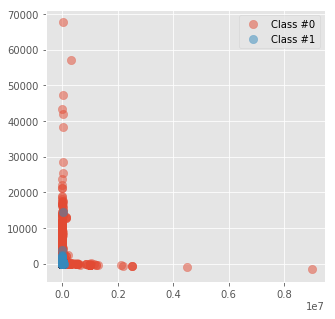

Decision Tree F1 score: 0.151 
Decision Tree accuracy score: 0.9889 
Decision Tree F_Beta-Score (Beta=10): 0.1378 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1661 
Random Forest accuracy score: 0.9937 
F_Beta-Score (Beta=10): 0.3727 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.2
y.shape =  120690 y.mean() =  0.006736032465081163


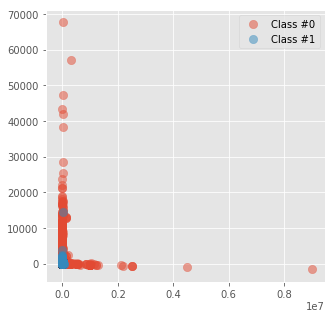

Decision Tree F1 score: 0.1532 
Decision Tree accuracy score: 0.9902 
Decision Tree F_Beta-Score (Beta=10): 0.1554 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1392 
Random Forest accuracy score: 0.9935 
F_Beta-Score (Beta=10): 0.3025 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.3
y.shape =  137931 y.mean() =  0.0070625109546246555


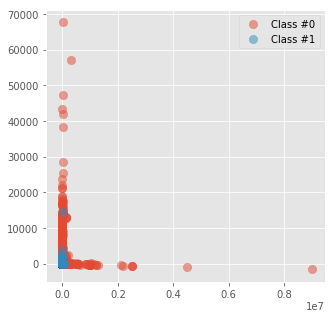

Decision Tree F1 score: 0.1325 
Decision Tree accuracy score: 0.9899 
Decision Tree F_Beta-Score (Beta=10): 0.1344 

Logistic Regression F1 score: 0.0256 
Logistic Regression accuracy score: 0.978 
Logistic Regression F_Beta-Score (Beta=10): 0.0174 

Random Forest F1 score: 0.1505 
Random Forest accuracy score: 0.9935 
F_Beta-Score (Beta=10): 0.3171 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.4
y.shape =  160920 y.mean() =  0.0074731681462832916


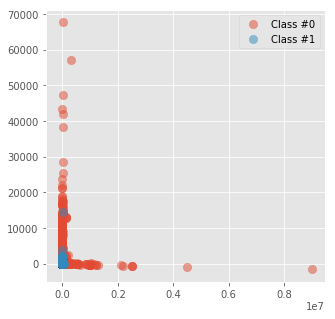

Decision Tree F1 score: 0.1347 
Decision Tree accuracy score: 0.9898 
Decision Tree F_Beta-Score (Beta=10): 0.1347 

Logistic Regression F1 score: 0.0172 
Logistic Regression accuracy score: 0.3839 
Logistic Regression F_Beta-Score (Beta=10): 0.0088 

Random Forest F1 score: 0.1278 
Random Forest accuracy score: 0.9934 
F_Beta-Score (Beta=10): 0.2867 

---------------------------------------------------------------------------------------------------------------
Target percentage 0.5
y.shape =  193104 y.mean() =  0.007914694729415915


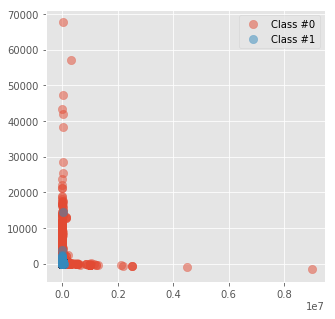

Decision Tree F1 score: 0.0945 
Decision Tree accuracy score: 0.9894 
Decision Tree F_Beta-Score (Beta=10): 0.095 

Logistic Regression F1 score: 0.0158 
Logistic Regression accuracy score: 0.3201 
Logistic Regression F_Beta-Score (Beta=10): 0.008 

Random Forest F1 score: 0.172 
Random Forest accuracy score: 0.9938 
F_Beta-Score (Beta=10): 0.3817 



In [14]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print('---------------------------------------------------------------------------------------------------------------')
    X_u, y_u = OverSamplingGraph(x_vis, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()
    
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    
    clf1=DecisionTreeClassifier(random_state=1).fit(X_u,y_u)
    y1_pred=clf1.predict(X_test)
    
    clf2=LogisticRegression(solver='sag',random_state=1).fit(X_u,y_u)
    y2_pred=clf2.predict(X_test)
    
    clf3=RandomForestClassifier(n_estimators=10,random_state=1).fit(X_u,y_u)
    y3_pred=clf3.predict(X_test)
    
    results=results.append({'Método':'Random Over Sampling','Modelo':'Decision Tree',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y1_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y1_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y1_pred, y_test,beta=10),4)},ignore_index=True)
    
    results=results.append({'Método':'Random Over Sampling','Modelo':'Logistic Regressiont',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y2_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y2_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y2_pred, y_test,beta=10),4)},ignore_index=True)
    
    results=results.append({'Método':'Random Over Sampling','Modelo':'Random Forest',
                            'Param_Iter':('Percentage='+str(target_percentage)),
                            'Accuracy':round(metrics.accuracy_score(y3_pred, y_test),4),
                            'F1 Score':round(metrics.f1_score(y3_pred, y_test),4),
                            'F_Beta-Score':round(metrics.fbeta_score(y3_pred, y_test,beta=10),4)},ignore_index=True)

    print('Decision Tree F1 score:',round(metrics.f1_score(y1_pred, y_test),4),
    '\nDecision Tree accuracy score:',round(metrics.accuracy_score(y1_pred, y_test),4),
    '\nDecision Tree F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y1_pred, y_test,beta=10),4),'\n')
          
    print('Logistic Regression F1 score:',round(metrics.f1_score(y2_pred, y_test),4),
    '\nLogistic Regression accuracy score:',round(metrics.accuracy_score(y2_pred, y_test),4),
    '\nLogistic Regression F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y2_pred, y_test,beta=10),4),'\n')
    
    print('Random Forest F1 score:',round(metrics.f1_score(y3_pred, y_test),4),
    '\nRandom Forest accuracy score:',round(metrics.accuracy_score(y3_pred, y_test),4),
    '\nF_Beta-Score (Beta=10):',round(metrics.fbeta_score(y3_pred, y_test,beta=10),4),'\n')

A medida que el target percentage se incrementaba porcentualmente, los indicadores de accuracy disminuyern en su valor lo cual nos indique que probablemente esta forma de balanceo no es la adecuada para el set de datos.

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [15]:
n_samples = y_train.shape[0]
n_samples_0=(y_train==0).sum()
n_samples_1=(y_train==1).sum()

def SMOTEGRAPH(X, y, target_percentage=0.5, k=5, seed=None):
    # Calculate the NearestNeighbors
    from sklearn.neighbors import NearestNeighbors
    nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
    nearest_neighbour_.fit(X[y==1])
    nns = nearest_neighbour_.kneighbors(X[y==1], 
                                    return_distance=False)[:, 1:]
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__=[]
    # Select one random neighbor for each example to use as base
    for i, sel in enumerate(sel_):
        nn__.append(np.random.choice(nns[sel]))
    
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [16]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    # Calculate the NearestNeighbors
    from sklearn.neighbors import NearestNeighbors
    nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
    nearest_neighbour_.fit(X[y==1])
    nns = nearest_neighbour_.kneighbors(X[y==1], 
                                    return_distance=False)[:, 1:]
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__=[]
    # Select one random neighbor for each example to use as base
    for i, sel in enumerate(sel_):
        nn__.append(np.random.choice(nns[sel]))
    
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  128736 y.mean() =  0.25


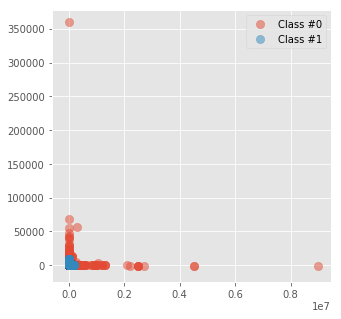

Decision Tree F1 score: 0.1155 
Decision Tree accuracy score: 0.9845 
Decision Tree F_Beta-Score (Beta=10): 0.0876 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1716 
Random Forest accuracy score: 0.9933 
F_Beta-Score (Beta=10): 0.3069 

Target percentage 0.25 k  15
y.shape =  128736 y.mean() =  0.25


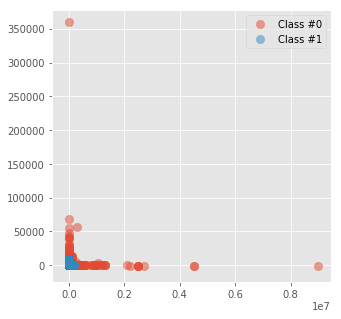

Decision Tree F1 score: 0.0873 
Decision Tree accuracy score: 0.9819 
Decision Tree F_Beta-Score (Beta=10): 0.0624 

Logistic Regression F1 score: 0.0 
Logistic Regression accuracy score: 0.9941 
Logistic Regression F_Beta-Score (Beta=10): 0.0 

Random Forest F1 score: 0.1392 
Random Forest accuracy score: 0.992 
F_Beta-Score (Beta=10): 0.1875 

Target percentage 0.5 k  5
y.shape =  193104 y.mean() =  0.5


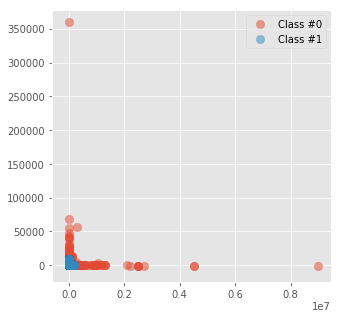

Decision Tree F1 score: 0.098 
Decision Tree accuracy score: 0.9841 
Decision Tree F_Beta-Score (Beta=10): 0.0738 

Logistic Regression F1 score: 0.0158 
Logistic Regression accuracy score: 0.3226 
Logistic Regression F_Beta-Score (Beta=10): 0.0081 

Random Forest F1 score: 0.1314 
Random Forest accuracy score: 0.9927 
F_Beta-Score (Beta=10): 0.2162 

Target percentage 0.5 k  15
y.shape =  193104 y.mean() =  0.5


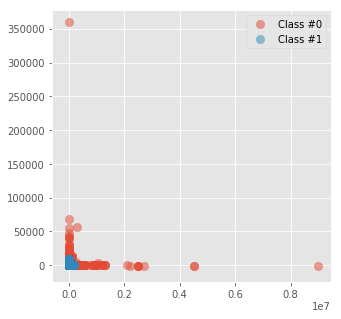

Decision Tree F1 score: 0.0879 
Decision Tree accuracy score: 0.9796 
Decision Tree F_Beta-Score (Beta=10): 0.06 

Logistic Regression F1 score: 0.0159 
Logistic Regression accuracy score: 0.3229 
Logistic Regression F_Beta-Score (Beta=10): 0.0081 

Random Forest F1 score: 0.1655 
Random Forest accuracy score: 0.9913 
F_Beta-Score (Beta=10): 0.1889 



In [31]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTEGRAPH(x_vis, y_train, target_percentage=target_percentage, k=k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show()
        
        X_u, y_u = SMOTE(X_train, y_train, target_percentage=target_percentage, k=k, seed=3)
        
        clf1=DecisionTreeClassifier(random_state=1).fit(X_u,y_u)
        y1_pred=clf1.predict(X_test)

        clf2=LogisticRegression(solver='sag',random_state=1).fit(X_u,y_u)
        y2_pred=clf2.predict(X_test)

        clf3=RandomForestClassifier(n_estimators=10,random_state=1).fit(X_u,y_u)
        y3_pred=clf3.predict(X_test)
        
        results=results.append({'Método':'SMOTE','Modelo':'Decision Tree',
                                'Param_Iter':('Percentage='+str(target_percentage),'k-neighbors='+str(k)),
                                'Accuracy':round(metrics.accuracy_score(y1_pred, y_test),4),
                                'F1 Score':round(metrics.f1_score(y1_pred, y_test),4),
                                'F_Beta-Score':round(metrics.fbeta_score(y1_pred, y_test,beta=10),4)},ignore_index=True)

        results=results.append({'Método':'SMOTE','Modelo':'Logistic Regressiont',
                                'Param_Iter':('Percentage='+str(target_percentage),'k-neighbors='+str(k)),
                                'Accuracy':round(metrics.accuracy_score(y2_pred, y_test),4),
                                'F1 Score':round(metrics.f1_score(y2_pred, y_test),4),
                                'F_Beta-Score':round(metrics.fbeta_score(y2_pred, y_test,beta=10),4)},ignore_index=True)

        results=results.append({'Método':'SMOTE','Modelo':'Random Forest',
                                'Param_Iter':('Percentage='+str(target_percentage),'k-neighbors='+str(k)),
                                'Accuracy':round(metrics.accuracy_score(y3_pred, y_test),4),
                                'F1 Score':round(metrics.f1_score(y3_pred, y_test),4),
                                'F_Beta-Score':round(metrics.fbeta_score(y3_pred, y_test,beta=10),4)},ignore_index=True)

        print('Decision Tree F1 score:',round(metrics.f1_score(y1_pred, y_test),4),
        '\nDecision Tree accuracy score:',round(metrics.accuracy_score(y1_pred, y_test),4),
        '\nDecision Tree F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y1_pred, y_test,beta=10),4),'\n')

        print('Logistic Regression F1 score:',round(metrics.f1_score(y2_pred, y_test),4),
        '\nLogistic Regression accuracy score:',round(metrics.accuracy_score(y2_pred, y_test),4),
        '\nLogistic Regression F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y2_pred, y_test,beta=10),4),'\n')

        print('Random Forest F1 score:',round(metrics.f1_score(y3_pred, y_test),4),
        '\nRandom Forest accuracy score:',round(metrics.accuracy_score(y3_pred, y_test),4),
        '\nF_Beta-Score (Beta=10):',round(metrics.fbeta_score(y3_pred, y_test,beta=10),4),'\n')

Los parámetros com k=15 y porcentaje=25 son los que mejores resultados presentan

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

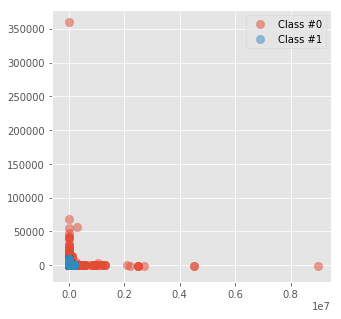

Decision Tree F1 score: 0.0757 
Decision Tree accuracy score: 0.9836 
Decision Tree F_Beta-Score (Beta=10): 0.0568 

Logistic Regression F1 score: 0.0161 
Logistic Regression accuracy score: 0.3324 
Logistic Regression F_Beta-Score (Beta=10): 0.0082 

Random Forest F1 score: 0.1783 
Random Forest accuracy score: 0.9929 
F_Beta-Score (Beta=10): 0.2775 



In [20]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=1)
X_u, y_u = ada.fit_resample(x_vis, y_train)

plot_two_classes(X_u, y_u, size=(5, 5))
plt.show()

X_u, y_u = ada.fit_resample(X_train, y_train)

clf1=DecisionTreeClassifier(random_state=1).fit(X_u,y_u)
y1_pred=clf1.predict(X_test)

clf2=LogisticRegression(solver='sag',random_state=1).fit(X_u,y_u)
y2_pred=clf2.predict(X_test)

clf3=RandomForestClassifier(n_estimators=10,random_state=1).fit(X_u,y_u)
y3_pred=clf3.predict(X_test)

results=results.append({'Método':'ADASYN','Modelo':'Decision Tree',
                        'Accuracy':round(metrics.accuracy_score(y1_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y1_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y1_pred, y_test,beta=10),4)},ignore_index=True)

results=results.append({'Método':'ADASYN','Modelo':'Logistic Regressiont',
                        'Accuracy':round(metrics.accuracy_score(y2_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y2_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y2_pred, y_test,beta=10),4)},ignore_index=True)

results=results.append({'Método':'ADASYN','Modelo':'Random Forest',
                        'Accuracy':round(metrics.accuracy_score(y3_pred, y_test),4),
                        'F1 Score':round(metrics.f1_score(y3_pred, y_test),4),
                        'F_Beta-Score':round(metrics.fbeta_score(y3_pred, y_test,beta=10),4)},ignore_index=True)

print('Decision Tree F1 score:',round(metrics.f1_score(y1_pred, y_test),4),
'\nDecision Tree accuracy score:',round(metrics.accuracy_score(y1_pred, y_test),4),
'\nDecision Tree F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y1_pred, y_test,beta=10),4),'\n')

print('Logistic Regression F1 score:',round(metrics.f1_score(y2_pred, y_test),4),
'\nLogistic Regression accuracy score:',round(metrics.accuracy_score(y2_pred, y_test),4),
'\nLogistic Regression F_Beta-Score (Beta=10):',round(metrics.fbeta_score(y2_pred, y_test,beta=10),4),'\n')

print('Random Forest F1 score:',round(metrics.f1_score(y3_pred, y_test),4),
'\nRandom Forest accuracy score:',round(metrics.accuracy_score(y3_pred, y_test),4),
'\nF_Beta-Score (Beta=10):',round(metrics.fbeta_score(y3_pred, y_test,beta=10),4),'\n')

# Exercise 15.6 (3 points)

Compare and comment about the results

In [21]:
results

,Método,Modelo,Param_Iter,Accuracy,F1 Score,F_Beta-Score
0,Ninguno,Decision Tree,NaN,0.9889,0.1346,0.1243
1,Ninguno,Logistic Regression,NaN,0.9941,0.0000,0.0000
2,Ninguno,Random Forest,NaN,0.9942,0.1418,0.5120
3,Random Under Sampling,Decision Tree,Percentage=0.1,0.9203,0.0531,0.0288
4,Random Under Sampling,Logistic Regressiont,Percentage=0.1,0.9941,0.0000,0.0000
5,Random Under Sampling,Random Forest,Percentage=0.1,0.9835,0.1548,0.1113
6,Random Under Sampling,Decision Tree,Percentage=0.2,0.8598,0.0411,0.0216
7,Random Under Sampling,Logistic Regressiont,Percentage=0.2,0.9941,0.0000,0.0000
8,Random Under Sampling,Random Forest,Percentage=0.2,0.9583,0.1079,0.0623
9,Random Under Sampling,Decision Tree,Percentage=0.3,0.7848,0.0322,0.0167


In [29]:
results[results['Accuracy']==max(results['Accuracy'])]

,Método,Modelo,Param_Iter,Accuracy,F1 Score,F_Beta-Score
2,Ninguno,Random Forest,NaN,0.9942,0.1418,0.512


In [30]:
results[results['F1 Score']==max(results['F1 Score'])]

,Método,Modelo,Param_Iter,Accuracy,F1 Score,F_Beta-Score
47,ADASYN,Random Forest,NaN,0.9929,0.1783,0.2775


In [28]:
results[results['F_Beta-Score']==max(results['F_Beta-Score'])]

,Método,Modelo,Param_Iter,Accuracy,F1 Score,F_Beta-Score
2,Ninguno,Random Forest,NaN,0.9942,0.1418,0.512


Los resultados agrupados muestran que de los modelos de balanceo, todos tienen parámetros que mejoran los indicadores, pero el común denominador es que el RF presenta los mejores resultados sobre los demás modelos, se destaca que el método ADASYN presentó el F1 Score más alto en el modelo de RF.